In [69]:
import numpy as np
import pandas as pd
import scipy 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [2]:
df_segmentation=pd.read_csv('segmentation data.csv',index_col=0)

In [3]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [4]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

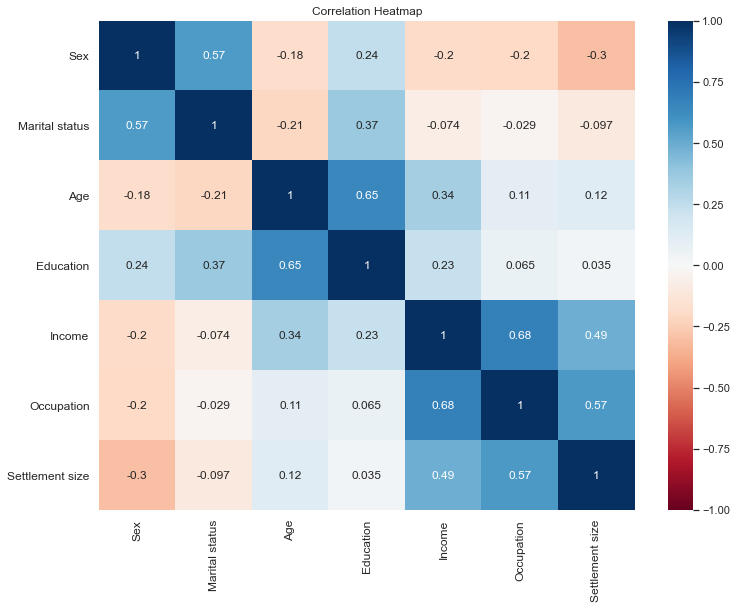

In [5]:
plt.figure(figsize=(12,9))
s=sns.heatmap(df_segmentation.corr(),
              annot=True,
              cmap='RdBu',
              vmin=-1,
              vmax=1
             )
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Visualization of raw data')

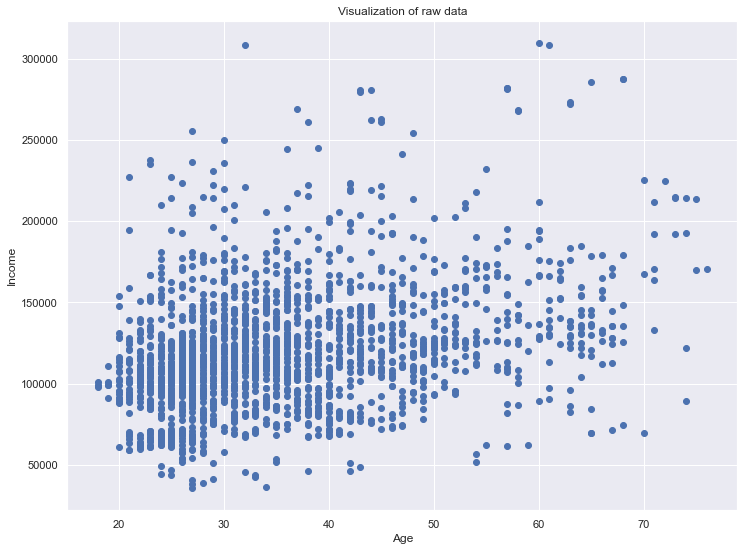

In [6]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

In [7]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_segmentation)

## Hierachial clustering

In [8]:
hier_clust=linkage(segmentation_std,method='ward')

## K-means clustering



In [9]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=2)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

In [10]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=2)

In [11]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=2)

In [12]:
df_segm_kmeans=df_segmentation.copy()
df_segm_kmeans['Segment K-means']=kmeans.labels_

In [13]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,2
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,1
100000005,0,0,53,1,149031,1,1,1


In [14]:
df_segm_analysis=df_segm_kmeans.groupby('Segment K-means').mean()

In [15]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [16]:
df_segm_analysis['N Obs']=df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [17]:
df_segm_analysis['Prop Obs']=df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [18]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
2,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [19]:
df_segm_analysis.rename({0:'well off',
                        1: 'fewer opportunities',
                        2:'standard',
                        3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well off,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
fewer opportunities,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [20]:
df_segm_kmeans['Labels']=df_segm_kmeans['Segment K-means'].map({0:'well off',
                        1: 'fewer opportunities',
                        2:'standard',
                        3:'career focused'})

In [21]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,2,standard
100000002,1,1,22,1,150773,1,2,3,career focused
100000003,0,0,49,1,89210,0,0,0,well off
100000004,0,0,45,1,171565,1,1,1,fewer opportunities
100000005,0,0,53,1,149031,1,1,1,fewer opportunities


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income'>

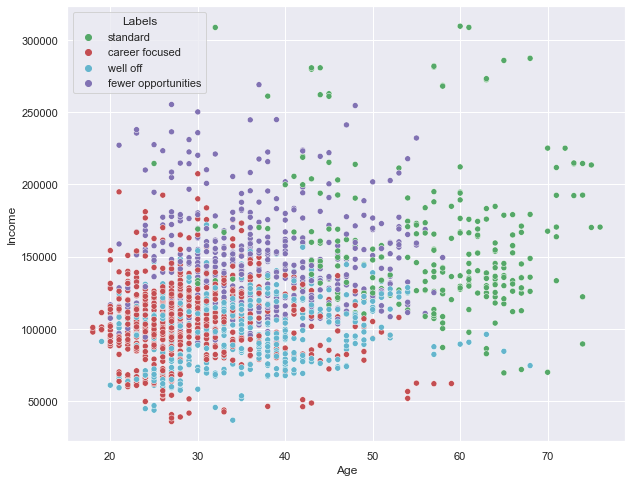

In [22]:
x_axis=df_segm_kmeans['Age']
y_axis=df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])

## PCA


In [23]:
pca=PCA()


In [24]:
pca.fit(segmentation_std)

PCA()

In [25]:
#then visualize and choose n components=3

In [26]:
pca=PCA(n_components=3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [27]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [37]:
df_pca_comp=pd.DataFrame(data=pca.components_,
                        columns=df_segmentation.columns.values,
                        index=['Component1','Component2','Component3'])

In [38]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x1dce55b8fd0>,
 [Text(0, 0, 'Component1'),
  Text(0, 1, 'Component2'),
  Text(0, 2, 'Component3')])

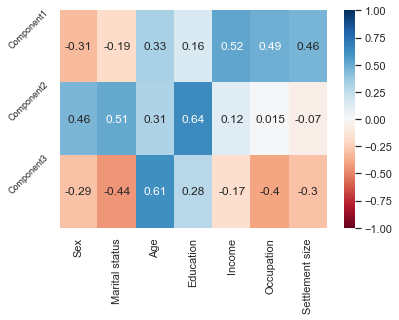

In [30]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2],
          ['Component1','Component2','Component3'],
          rotation=45,
          fontsize=9)

In [31]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [32]:
scores_pca=pca.transform(segmentation_std)

## Kmeans clustering with PCA

In [33]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

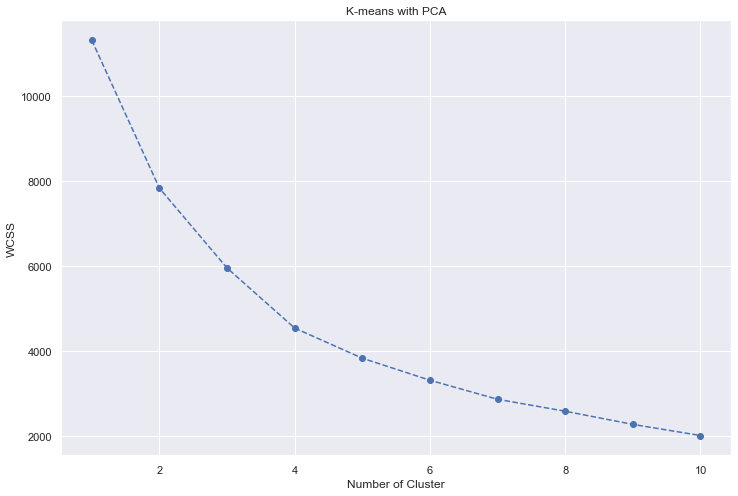

In [34]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('K-means with PCA')
plt.show()

In [53]:
kmeans_pca= KMeans(n_clusters=4,init='k-means++',random_state=42)

In [54]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## PCA Results

In [55]:
df_segm_pca_kmeans=pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component1','Component2','Component3']

In [56]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909


In [57]:
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [58]:
df_segm_pca_kmeans['segment k-means PCA']=kmeans_pca.predict(scores_pca)

In [59]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,segment k-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [60]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans.groupby('segment k-means PCA').mean()

In [61]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3
segment k-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [62]:
df_segm_pca_kmeans_freq['N Obs']=df_segm_pca_kmeans[['segment k-means PCA','Sex']].groupby('segment k-means PCA').count()
df_segm_pca_kmeans_freq['Prop Obs']=df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()

In [64]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,N Obs,Prop Obs
segment k-means PCA,,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [66]:
df_segm_pca_kmeans_freq.rename({0:'Standard',
                               1:'Career focused',
                               2:'Fewer Opportunities',
                               3:'Wealthy'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,N Obs,Prop Obs
segment k-means PCA,,,,,,,,,,,,
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Fewer Opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Wealthy,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [67]:
df_segm_pca_kmeans['Legend']=df_segm_pca_kmeans['segment k-means PCA'].map({0:'Standard',
                               1:'Career focused',
                               2:'Fewer Opportunities',
                               3:'Wealthy'})

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster by PCA Component')

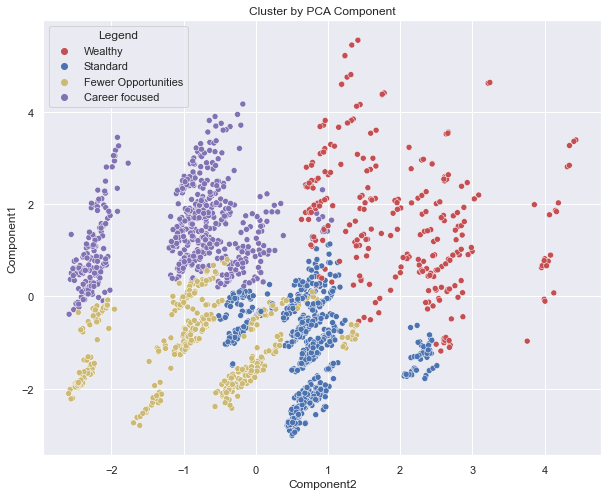

In [68]:
x_axis=df_segm_pca_kmeans['Component2']
y_axis=df_segm_pca_kmeans['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['Legend'],palette=['r','b','y','m'])
plt.title('Cluster by PCA Component')

## Export

In [70]:
pickle.dump(scaler,open('scaler.pickle','wb'))


In [71]:
pickle.dump(pca,open('pca.pickle','wb'))


In [72]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))